# Data Preprocessing

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [3]:
df = pd.read_csv("./test_point_1.csv")

Check the shape and check for null/NaN values.

In [4]:
df.shape

(1106, 11)

In [5]:
df.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
macAddress              0
locationCoordinate_x    0
locationCoordinate_y    0
confidenceFactor        0
maxDetectedRssi         0
CMX_lastSeen            0
Real_Time               0
RMSE                    0
Test_point              0
dtype: int64

Produce statistics describing the dataset.

In [6]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,locationCoordinate_x,locationCoordinate_y,confidenceFactor,maxDetectedRssi,RMSE,Test_point
count,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.0
mean,552.500000,552.500000,26.715543,12.330167,62.835443,-61.239602,20.277288,1.0
std,319.419004,319.419004,17.226914,14.184704,19.955517,5.209590,20.579531,0.0
min,0.000000,0.000000,8.815560,0.000000,32.000000,-72.000000,0.040496,1.0
25%,276.250000,276.250000,16.797810,0.000000,40.000000,-62.000000,3.734642,1.0
50%,552.500000,552.500000,20.360548,1.202192,80.000000,-59.000000,10.876640,1.0
75%,828.750000,828.750000,24.949219,31.683264,80.000000,-58.000000,34.962825,1.0
max,1105.000000,1105.000000,63.107998,34.657078,80.000000,-56.000000,59.180176,1.0


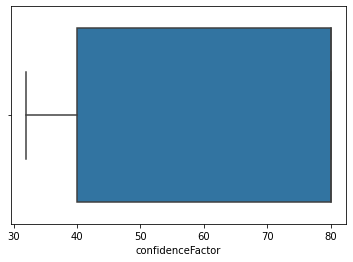

In [7]:
confidence_box=sns.boxplot(x='confidenceFactor', data=df)

Let's plot the distribution of RMSE to find out in what range the CMX fall in terms of RMSE.

C:\Users\zcui\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RMSE', ylabel='Density'>

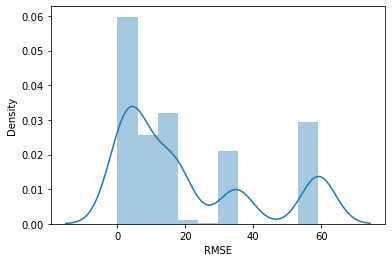

In [8]:
sns.distplot(df['RMSE'])

# Analysis & Summary

# The relationship between confidence factor and precision

In [9]:
#Acquiring the macAddress of devices

mAdd = set()
for i in df['macAddress'].str.split(','):
    mAdd = set().union(i,mAdd)    

In [10]:
#for loop, lan is a list, la is a string
for mA in mAdd:
    df[mA] = df['macAddress'].str.contains(mA).apply(lambda x:1 if x else 0)

In [11]:
#Return 1 if each line contains a macAddress, 0 otherwise
df_gy = df.loc[:,mAdd]
df_gy

C:\Users\zcui\AppData\Local\Temp\ipykernel_12260\2975791856.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_gy = df.loc[:,mAdd]


,f4:02:28:5a:28:63,dc:a6:32:26:67:ab
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1101,0,1
1102,0,1
1103,0,1
1104,0,1


In [12]:
df_gy.index=df['RMSE']
df_gy.head()

,f4:02:28:5a:28:63,dc:a6:32:26:67:ab
RMSE,,
34.962825,1,0
34.962825,1,0
34.962825,1,0
34.962825,1,0
34.962825,1,0


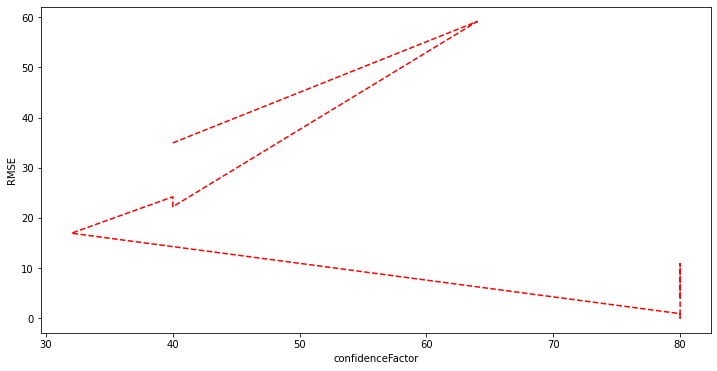

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['confidenceFactor'],df['RMSE'], 'r--')
plt.xlabel('confidenceFactor')
plt.ylabel('RMSE')
plt.show()